In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import torch
import torch.nn as nn

In [2]:
df = pd.read_csv('LOLOracleData_ChampStats.csv')

In [3]:
df.head()

,BTop,BTopWr,BToptags,BTophp,BTophpperlevel,BTopmovespeed,BToparmor,BToparmorperlevel,BTopspellblock,BTopspellblockperlevel,...,RSupspellblock,RSupspellblockperlevel,RSupattackrange,RSuphpregen,RSuphpregenperlevel,RSupattackdamage,RSupattackdamageperlevel,RSupattackspeedperlevel,RSupattackspeed,Winner
0,Camille,0.524364,Diver,575.6,85,340,35.0,3.8,32.1,1.25,...,30.0,0.50,525,5.5,0.55,53.5440,3.3000,2.300,0.625,1
1,Camille,0.524364,Diver,575.6,85,340,35.0,3.8,32.1,1.25,...,30.0,0.50,525,5.5,0.55,54.9379,3.1416,1.360,0.625,0
2,Irelia,0.513399,Diver,580.0,95,335,36.0,3.0,32.0,1.25,...,32.1,1.25,125,5.0,0.75,63.5400,3.3000,2.125,0.800,0
3,Graves,0.511305,Specialist,555.0,92,340,33.0,3.4,32.0,1.25,...,32.0,1.25,150,7.0,0.50,62.0000,2.0000,2.500,0.667,1
4,Camille,0.524364,Diver,575.6,85,340,35.0,3.8,32.1,1.25,...,28.0,1.25,175,10.0,0.65,64.0000,3.3000,2.950,0.644,1


In [4]:
print(df.columns)

Index(['BTop', 'BTopWr', 'BToptags', 'BTophp', 'BTophpperlevel',
       'BTopmovespeed', 'BToparmor', 'BToparmorperlevel', 'BTopspellblock',
       'BTopspellblockperlevel',
       ...
       'RSupspellblock', 'RSupspellblockperlevel', 'RSupattackrange',
       'RSuphpregen', 'RSuphpregenperlevel', 'RSupattackdamage',
       'RSupattackdamageperlevel', 'RSupattackspeedperlevel',
       'RSupattackspeed', 'Winner'],
      dtype='object', length=171)


In [5]:
req_cols = ['BTop','BJng','BMid','BAdc','BSup','RTop','RJng','RMid','RAdc','RSup','BTopWr','BJngWr','BMidWr','BAdcWr','BSupWr','RTopWr','RJngWr','RMidWr','RAdcWr','RSupWr','BToptags','BJngtags','BMidtags','BAdctags','BSuptags','RToptags','RJngtags','RMidtags','RAdctags','RSuptags','Winner']

In [6]:
columns = list(df.columns)

In [7]:
for i in range(len(req_cols)):
    columns.remove(req_cols[i])

In [8]:
columns

['BTophp',
 'BTophpperlevel',
 'BTopmovespeed',
 'BToparmor',
 'BToparmorperlevel',
 'BTopspellblock',
 'BTopspellblockperlevel',
 'BTopattackrange',
 'BTophpregen',
 'BTophpregenperlevel',
 'BTopattackdamage',
 'BTopattackdamageperlevel',
 'BTopattackspeedperlevel',
 'BTopattackspeed',
 'BJnghp',
 'BJnghpperlevel',
 'BJngmovespeed',
 'BJngarmor',
 'BJngarmorperlevel',
 'BJngspellblock',
 'BJngspellblockperlevel',
 'BJngattackrange',
 'BJnghpregen',
 'BJnghpregenperlevel',
 'BJngattackdamage',
 'BJngattackdamageperlevel',
 'BJngattackspeedperlevel',
 'BJngattackspeed',
 'BMidhp',
 'BMidhpperlevel',
 'BMidmovespeed',
 'BMidarmor',
 'BMidarmorperlevel',
 'BMidspellblock',
 'BMidspellblockperlevel',
 'BMidattackrange',
 'BMidhpregen',
 'BMidhpregenperlevel',
 'BMidattackdamage',
 'BMidattackdamageperlevel',
 'BMidattackspeedperlevel',
 'BMidattackspeed',
 'BAdchp',
 'BAdchpperlevel',
 'BAdcmovespeed',
 'BAdcarmor',
 'BAdcarmorperlevel',
 'BAdcspellblock',
 'BAdcspellblockperlevel',
 'BAdc

In [9]:
df.drop(columns,axis=1,inplace=True)

In [10]:
df

,BTop,BTopWr,BToptags,BJng,BJngWr,BJngtags,BMid,BMidWr,BMidtags,BAdc,...,RMid,RMidWr,RMidtags,RAdc,RAdcWr,RAdctags,RSup,RSupWr,RSuptags,Winner
0,Camille,0.524364,Diver,Gragas,0.506967,Vanguard,Yone,0.497972,Skirmisher,Jhin,...,Sylas,0.491465,Burst,Kai'Sa,0.503883,Marksman,Karma,0.492260,Enchanter,1
1,Camille,0.524364,Diver,Nidalee,0.504318,Specialist,Galio,0.565594,Warden,Jhin,...,Xerath,0.559211,Artillery,Miss Fortune,0.504505,Marksman,Vel'Koz,0.440678,Artillery,0
2,Irelia,0.513399,Diver,Ekko,0.486450,Assassin,Annie,0.553073,Burst,Kai'Sa,...,Orianna,0.465315,Burst,Aphelios,0.470158,Marksman,Maokai,0.527418,Vanguard,0
3,Graves,0.511305,Specialist,Kindred,0.505097,Marksman,Sylas,0.502868,Burst,Vayne,...,Ekko,0.508434,Assassin,Sivir,0.393443,Marksman,Pyke,0.492582,Assassin,1
4,Camille,0.524364,Diver,Lee Sin,0.509764,Diver,Lucian,0.421169,Marksman,Kai'Sa,...,Yone,0.445918,Skirmisher,Orianna,0.465315,Burst,Pantheon,0.473513,Diver,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19674,Jayce,0.517039,Artillery,Graves,0.511305,Specialist,Viktor,0.517730,Battlemage,Swain,...,Galio,0.551313,Warden,Ezreal,0.457083,Marksman,Seraphine,0.487002,Enchanter,1
19675,Lucian,0.471641,Marksman,Lillia,0.504717,Skirmisher,Ekko,0.533333,Assassin,Vayne,...,Azir,0.532787,Specialist,Samira,0.476318,Marksman,Alistar,0.509198,Vanguard,1
19676,Tristana,0.493113,Marksman,Graves,0.511305,Specialist,Wukong,0.521495,Diver,Ziggs,...,Lucian,0.467672,Marksman,Ezreal,0.457083,Marksman,Braum,0.479401,Warden,0
19677,Vladimir,0.470149,Battlemage,Udyr,0.507246,Juggernaut,Twisted Fate,0.470037,Burst,Samira,...,Viktor,0.506708,Battlemage,Lucian,0.497414,Marksman,Thresh,0.516721,Catcher,0


In [11]:
df2 = pd.read_csv('LOLOracleDatawithSynscores.csv')

In [12]:
df2.head()

,BTop,BJng,BMid,BAdc,BSup,RTop,RJng,RMid,RAdc,RSup,Winner,BSyn,RSyn
0,Camille,Gragas,Yone,Jhin,Brand,Shen,Graves,Sylas,Kai'Sa,Karma,1,136,282
1,Camille,Nidalee,Galio,Jhin,Anivia,Riven,Hecarim,Xerath,Miss Fortune,Vel'Koz,0,496,66
2,Irelia,Ekko,Annie,Kai'Sa,Thresh,Aatrox,Jarvan IV,Orianna,Aphelios,Maokai,0,236,16
3,Graves,Kindred,Sylas,Vayne,Bard,Renekton,Nidalee,Ekko,Sivir,Pyke,1,60,104
4,Camille,Lee Sin,Lucian,Kai'Sa,Leona,Jhin,Nidalee,Yone,Orianna,Pantheon,1,-32,-32


In [13]:
df2.columns

Index(['BTop', 'BJng', 'BMid', 'BAdc', 'BSup', 'RTop', 'RJng', 'RMid', 'RAdc',
       'RSup', 'Winner', 'BSyn', 'RSyn'],
      dtype='object')

In [14]:
df2.drop(['BTop', 'BJng', 'BMid', 'BAdc', 'BSup', 'RTop', 'RJng', 'RMid', 'RAdc',
       'RSup', 'Winner'],axis=1,inplace=True)

In [15]:
df = pd.concat([df,df2],axis=1)

In [16]:
df.head(50)

,BTop,BTopWr,BToptags,BJng,BJngWr,BJngtags,BMid,BMidWr,BMidtags,BAdc,...,RMidtags,RAdc,RAdcWr,RAdctags,RSup,RSupWr,RSuptags,Winner,BSyn,RSyn
0,Camille,0.524364,Diver,Gragas,0.506967,Vanguard,Yone,0.497972,Skirmisher,Jhin,...,Burst,Kai'Sa,0.503883,Marksman,Karma,0.492260,Enchanter,1,136,282
1,Camille,0.524364,Diver,Nidalee,0.504318,Specialist,Galio,0.565594,Warden,Jhin,...,Artillery,Miss Fortune,0.504505,Marksman,Vel'Koz,0.440678,Artillery,0,496,66
2,Irelia,0.513399,Diver,Ekko,0.486450,Assassin,Annie,0.553073,Burst,Kai'Sa,...,Burst,Aphelios,0.470158,Marksman,Maokai,0.527418,Vanguard,0,236,16
3,Graves,0.511305,Specialist,Kindred,0.505097,Marksman,Sylas,0.502868,Burst,Vayne,...,Assassin,Sivir,0.393443,Marksman,Pyke,0.492582,Assassin,1,60,104
4,Camille,0.524364,Diver,Lee Sin,0.509764,Diver,Lucian,0.421169,Marksman,Kai'Sa,...,Skirmisher,Orianna,0.465315,Burst,Pantheon,0.473513,Diver,1,-32,-32
5,Camille,0.524364,Diver,Nidalee,0.504318,Specialist,Jayce,0.511962,Artillery,Kai'Sa,...,Marksman,Caitlyn,0.468451,Marksman,Sett,0.424386,Juggernaut,0,230,-154
6,Camille,0.524364,Diver,Cho'Gath,0.458904,Specialist,Vladimir,0.520958,Battlemage,Jhin,...,Assassin,Kai'Sa,0.503883,Marksman,Maokai,0.527418,Vanguard,1,102,312
7,Vladimir,0.470149,Battlemage,Kindred,0.505097,Marksman,Lulu,0.498881,Enchanter,Tahm Kench,...,Battlemage,Samira,0.476318,Marksman,Thresh,0.516721,Catcher,1,-60,118
8,Volibear,0.448718,Juggernaut,Fiddlesticks,0.557018,Specialist,Galio,0.565594,Warden,Ezreal,...,Assassin,Lucian,0.497414,Marksman,Lulu,0.502555,Enchanter,1,28,-162
9,Renekton,0.507547,Diver,Olaf,0.548387,Diver,Twisted Fate,0.470037,Burst,Seraphine,...,Vanguard,Kai'Sa,0.503883,Marksman,Taric,0.520930,Warden,0,118,12


In [17]:
df['Winner'].value_counts()

0    9920
1    9759
Name: Winner, dtype: int64

In [18]:
cat_cols = ['BTop','BJng','BMid','BAdc','BSup','RTop','RJng','RMid','RAdc','RSup','BToptags','BJngtags','BMidtags','BAdctags','BSuptags','RToptags','RJngtags','RMidtags','RAdctags','RSuptags']

In [19]:
cont_cols = list(df.columns)

for i in cont_cols:
    if i in cat_cols:
        cont_cols.remove(i)

In [20]:
cont_cols.remove('Winner')

In [21]:
c = ['BTop','BJng','BMid','BAdc','BSup','RTop','RJng','RMid','RAdc','RSup']

In [22]:
for i in cont_cols:
    if i in c:
        cont_cols.remove(i)

In [23]:
len(cont_cols)

12

In [24]:
cont_cols

['BTopWr',
 'BJngWr',
 'BMidWr',
 'BAdcWr',
 'BSupWr',
 'RTopWr',
 'RJngWr',
 'RMidWr',
 'RAdcWr',
 'RSupWr',
 'BSyn',
 'RSyn']

In [25]:
len(df.columns)

33

In [26]:
len(cat_cols)

20

In [27]:
df.dtypes

BTop         object
BTopWr      float64
BToptags     object
BJng         object
BJngWr      float64
BJngtags     object
BMid         object
BMidWr      float64
BMidtags     object
BAdc         object
BAdcWr      float64
BAdctags     object
BSup         object
BSupWr      float64
BSuptags     object
RTop         object
RTopWr      float64
RToptags     object
RJng         object
RJngWr      float64
RJngtags     object
RMid         object
RMidWr      float64
RMidtags     object
RAdc         object
RAdcWr      float64
RAdctags     object
RSup         object
RSupWr      float64
RSuptags     object
Winner        int64
BSyn          int64
RSyn          int64
dtype: object

In [28]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [29]:
df.dtypes

BTop        category
BTopWr       float64
BToptags    category
BJng        category
BJngWr       float64
BJngtags    category
BMid        category
BMidWr       float64
BMidtags    category
BAdc        category
BAdcWr       float64
BAdctags    category
BSup        category
BSupWr       float64
BSuptags    category
RTop        category
RTopWr       float64
RToptags    category
RJng        category
RJngWr       float64
RJngtags    category
RMid        category
RMidWr       float64
RMidtags    category
RAdc        category
RAdcWr       float64
RAdctags    category
RSup        category
RSupWr       float64
RSuptags    category
Winner         int64
BSyn           int64
RSyn           int64
dtype: object

In [30]:
df['BToptags'].head()

0         Diver
1         Diver
2         Diver
3    Specialist
4         Diver
Name: BToptags, dtype: category
Categories (13, object): ['Artillery', 'Assassin', 'Battlemage', 'Burst', ..., 'Skirmisher', 'Specialist', 'Vanguard', 'Warden']

In [31]:
df['BToptags'].cat.categories

Index(['Artillery', 'Assassin', 'Battlemage', 'Burst', 'Catcher', 'Diver',
       'Enchanter', 'Juggernaut', 'Marksman', 'Skirmisher', 'Specialist',
       'Vanguard', 'Warden'],
      dtype='object')

In [32]:
df['BToptags'].cat.codes

0         5
1         5
2         5
3        10
4         5
         ..
19674     0
19675     8
19676     8
19677     2
19678     5
Length: 19679, dtype: int8

In [33]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [34]:
cats

array([[ 13,  19, 134, ...,   3,   8,   6],
       [ 13,  51,  30, ...,   0,   8,   0],
       [ 36,  12,   5, ...,   3,   8,  11],
       ...,
       [117,  20, 130, ...,   8,   8,  12],
       [130,  86, 117, ...,   2,   8,   4],
       [ 13,  37, 107, ...,  12,   8,   4]], dtype=int16)

In [35]:
cats.shape

(19679, 20)

In [36]:
cats = torch.tensor(cats, dtype=torch.int64)

In [37]:
cats

tensor([[ 13,  19, 134,  ...,   3,   8,   6],
        [ 13,  51,  30,  ...,   0,   8,   0],
        [ 36,  12,   5,  ...,   3,   8,  11],
        ...,
        [117,  20, 130,  ...,   8,   8,  12],
        [130,  86, 117,  ...,   2,   8,   4],
        [ 13,  37, 107,  ...,  12,   8,   4]])

In [38]:
conts = np.stack([df[col].values for col in cont_cols], 1)
conts = torch.tensor(conts, dtype=torch.float)

In [39]:
conts

tensor([[ 5.2436e-01,  5.0697e-01,  4.9797e-01,  ...,  4.9226e-01,
          1.3600e+02,  2.8200e+02],
        [ 5.2436e-01,  5.0432e-01,  5.6559e-01,  ...,  4.4068e-01,
          4.9600e+02,  6.6000e+01],
        [ 5.1340e-01,  4.8645e-01,  5.5307e-01,  ...,  5.2742e-01,
          2.3600e+02,  1.6000e+01],
        ...,
        [ 4.9311e-01,  5.1130e-01,  5.2149e-01,  ...,  4.7940e-01,
          6.2000e+01, -5.6400e+02],
        [ 4.7015e-01,  5.0725e-01,  4.7004e-01,  ...,  5.1672e-01,
         -8.6000e+01,  1.9000e+02],
        [ 5.2436e-01,  5.0976e-01,  5.0287e-01,  ...,  4.8482e-01,
         -2.3400e+02,  1.8200e+02]])

In [40]:
conts.shape

torch.Size([19679, 12])

In [41]:
conts.type()

'torch.FloatTensor'

In [42]:
y_col = ['Winner']

In [43]:
y = torch.tensor(df[y_col].values).flatten()

#Note: the CrossEntropyLoss function expects a 1d y-tensor, so we end up using .flatten()

In [44]:
y

tensor([1, 0, 0,  ..., 0, 0, 1])

In [45]:
cats.shape

torch.Size([19679, 20])

In [46]:
conts.shape

torch.Size([19679, 12])

In [47]:
y.shape

torch.Size([19679])

In [48]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(144, 50),
 (100, 50),
 (143, 50),
 (122, 50),
 (121, 50),
 (142, 50),
 (94, 47),
 (140, 50),
 (127, 50),
 (104, 50),
 (13, 7),
 (13, 7),
 (13, 7),
 (13, 7),
 (13, 7),
 (13, 7),
 (12, 6),
 (13, 7),
 (13, 7),
 (13, 7)]

In [49]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [50]:
model = TabularModel(emb_szs, conts.shape[1], 2, [1200, 800, 600, 400, 200, 120, 80], p=0.4) # out_sz = 2

In [51]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(144, 50)
    (1): Embedding(100, 50)
    (2): Embedding(143, 50)
    (3): Embedding(122, 50)
    (4): Embedding(121, 50)
    (5): Embedding(142, 50)
    (6): Embedding(94, 47)
    (7): Embedding(140, 50)
    (8): Embedding(127, 50)
    (9): Embedding(104, 50)
    (10): Embedding(13, 7)
    (11): Embedding(13, 7)
    (12): Embedding(13, 7)
    (13): Embedding(13, 7)
    (14): Embedding(13, 7)
    (15): Embedding(13, 7)
    (16): Embedding(12, 6)
    (17): Embedding(13, 7)
    (18): Embedding(13, 7)
    (19): Embedding(13, 7)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=578, out_features=1200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [53]:
batch_size = 10000
test_size = 5000

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [54]:
len(cat_train)

5000

In [55]:
len(cat_test)

5000

In [56]:
import time
start_time = time.time()

epochs = 250
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.81789583
epoch:  26  loss: 0.74556106
epoch:  51  loss: 0.71171051
epoch:  76  loss: 0.68463159
epoch: 101  loss: 0.65148616
epoch: 126  loss: 0.60538864
epoch: 151  loss: 0.55320382
epoch: 176  loss: 0.46536788
epoch: 201  loss: 0.38483024
epoch: 226  loss: 0.30953556
epoch: 250  loss: 0.24723560

Duration: 408 seconds


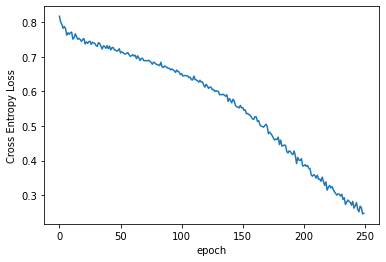

In [57]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [58]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 1.32196975


In [59]:
rows = 500
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 2.4415, -2.0245])    0      0   
tensor([-1.9893,  0.6390])    1      1   
tensor([-1.8589,  0.3665])    1      1   
tensor([ 1.3902, -1.2315])    0      1   
tensor([ 1.7933, -1.3584])    0      1   
tensor([ 0.7613, -0.9918])    0      0   
tensor([ 1.1863, -1.0129])    0      0   
tensor([ 0.8606, -0.9724])    0      1   
tensor([-0.0719,  0.4740])    1      1   
tensor([-2.9020,  1.2043])    1      1   
tensor([ 1.8915, -1.3455])    0      0   
tensor([-1.2222,  0.4809])    1      1   
tensor([ 0.0466, -0.3905])    0      0   
tensor([-2.0277,  0.9753])    1      0   
tensor([ 0.3974, -0.1593])    0      1   
tensor([ 0.2059, -0.3187])    0      0   
tensor([-1.4745,  0.4963])    1      1   
tensor([-2.9023,  2.1975])    1      1   
tensor([-2.7751,  2.6368])    1      1   
tensor([-1.3340,  1.3043])    1      1   
tensor([-0.6435,  0.5497])    1      1   
tensor([ 1.3214, -0.8978])    0      1   
tensor([ 1.0615, -0.5877])    0   

tensor([-0.5461,  0.0131])    1      0   
tensor([-1.2224,  0.7191])    1      1   
tensor([ 1.6341, -0.4970])    0      1   
tensor([-1.4945,  1.4773])    1      0   
tensor([ 1.6097, -0.6904])    0      0   
tensor([-0.9563,  1.4179])    1      0   
tensor([-0.3594,  0.3921])    1      1   
tensor([ 0.8119, -0.9532])    0      1   
tensor([-1.0192,  0.3875])    1      0   
tensor([ 2.5261, -1.0831])    0      1   
tensor([ 1.5634, -0.3997])    0      0   
tensor([-0.5719,  0.3889])    1      0   
tensor([ 4.2806, -2.2119])    0      0   
tensor([ 2.5319, -2.2495])    0      1   
tensor([ 0.0558, -0.0700])    0      0   
tensor([-3.5176,  2.8241])    1      0   
tensor([-3.7197,  1.4166])    1      1   
tensor([ 1.9424, -1.2458])    0      0   
tensor([-0.1562, -0.2569])    0      0   
tensor([ 0.7073, -0.3907])    0      1   
tensor([-2.1747,  0.7041])    1      1   
tensor([-1.3959,  0.3103])    1      0   
tensor([-0.0593, -0.3402])    0      1   
tensor([-3.7378,  2.9511])    1   

In [60]:
y_pred = []

for i in range(len(y_val)):
    a = y_val[i].argmax().item()
    y_pred.append(a)

In [61]:
len(y_pred)

5000

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_pred,y_test))
print('\n')
print(classification_report(y_pred,y_test))

[[1365 1134]
 [1064 1437]]


              precision    recall  f1-score   support

           0       0.56      0.55      0.55      2499
           1       0.56      0.57      0.57      2501

    accuracy                           0.56      5000
   macro avg       0.56      0.56      0.56      5000
weighted avg       0.56      0.56      0.56      5000

